<a href="https://colab.research.google.com/github/IvanAjala/data-science-portfolio/blob/main/An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20(EDA)/churn_analysis/notebooks/Copy_of_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Importação de Bibliotecas e Carregamento de Dados**

- **Importação das Bibliotecas**: O notebook começa importando bibliotecas essenciais para análise de dados (**`pandas`**, **`numpy`**) e visualização (**`matplotlib`** e **`seaborn`**).

- **Carregamento dos Dados**: Em seguida, o conjunto de dados é carregado usando **`pd.read_csv()`**, que lê o arquivo [Churn.csv](https://github.com/IvanAjala/data-science-portfolio/tree/cc0e7024da7ffb10f205bf0ff2b4262e733614d6/An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20(EDA)/churn_analysis/data) com os dados.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# URL do arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/IvanAjala/data-science-portfolio/main/An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20(EDA)/churn_analysis/data/Churn.csv'

# Importa a base de dados
df = pd.read_csv(url, sep=';')


## 2. **Análise Inicial dos Dados**

- **Visualização das Primeiras Linhas**: O notebook mostra as primeiras linhas do dataframe para dar uma visão geral dos dados.

In [9]:
# Visualização das primeiras linhas
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


- **Visualização das dimensões do Dataframe**: O notebook mostra o total de linhas x total de colunas.

In [10]:
# Visualizando o total de linhas e colunas
df.shape

(999, 12)

- **Informações Gerais**: São exibidas informações gerais como a quantidade de registros e colunas, tipos de dados, e presença de valores nulos.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      999 non-null    int64  
 1   X1      999 non-null    int64  
 2   X2      999 non-null    object 
 3   X3      991 non-null    object 
 4   X4      999 non-null    int64  
 5   X4.1    999 non-null    int64  
 6   X6      999 non-null    int64  
 7   X7      999 non-null    int64  
 8   X8      999 non-null    int64  
 9   X9      999 non-null    int64  
 10  X10     992 non-null    float64
 11  X11     999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


- **Estatísticas Descritivas**: Fornece estatísticas descritivas das colunas numéricas, como média, desvio padrão, mínimo e máximo.

In [12]:
df.describe()

,X0,X1,X4,X4.1,X6,X7,X8,X9,X10,X11
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


# 3. **Limpeza e Preparação dos Dados**


## 3.1 **Nomes das Colunas**
- As colunas possuem os seguintes nomes ( X0; X1; X2; X3; X4; X4.1; X6; X7; X8; X9; X10; X11 ).

In [15]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X4.1', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11'],
      dtype='object')

- **Renomeando as colunas**: Ao verificar o dicionário de dados, entende-se que o  significado para cada uma das colunas são respectivamente ("Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu")

In [16]:
# Renomeia as colunas de acordo com o dicionário de dados
df.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                  "Ativo","Salario","Saiu"]

In [20]:
# Verifica novos nomes para as colunas
df.columns

Index(['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo',
       'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

In [17]:
# Verifica novos nomes para as colunas em formato de tabela
df.head(2)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0


## 3.2 **Valores Nulos / Missing Values**

- **Valores Nulos**: Verifica e conta valores ausentes em cada coluna, o que ajuda a entender a qualidade dos dados e a necessidade de limpeza.

In [21]:
df.isnull().sum()

,0
Id,0
Score,0
Estado,0
Genero,8
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


- **Tratamento de dados faltantes**: As colunas **`Genero`** e **`Salario`** possuem valores faltantes e serão tratados conforme abaixo.

In [22]:
df['Salario'].describe()

,Salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


- **Substituindo valores faltantes pela Mediana na coluna Salario**: Como os dados estão distribuídos de forma assimétrica (ou seja, a distribuição é inclinada para um lado), a média pode ser distorcida por valores extremos. A mediana é menos afetada por esses outliers e reflete melhor o "centro" da distribuição resultando em uma estimativa mais estável e representativa da distribuição dos dados.

In [29]:
# Tratamento de dados faltantes
# Salário - Substituir pela mediana
df['Salario'].fillna(df['Salario'].median(), inplace = True)

- Verificando se ainda existem valores nulos em **Salario**

In [32]:
df['Salario'].isnull().sum()

0

In [33]:
df['Genero'].isnull().sum()

8

In [38]:
df['Genero'].value_counts()

,count
Genero,
Masculino,521
Feminino,461
M,6
F,2
Fem,1


- **Substituindo valores faltantes pela Moda na coluna Genero**: Pelo fato de ser uma variável categorica, calcular a média ou a mediana não faz sentido, porque essas medidas são projetadas para dados numéricos e contínuos. Estatisticamente falando, substituir **valores categóricos nulos** pela **Moda** garante que a substituição reflita a categoria mais comum no conjunto de dados, visto que ao substituir os valores nulos por uma categoria arbitrária ou por outra estratégia, pode introduzir um viés que não está presente na distribuição original. Portanto, a moda preserva a distribuição natural das categorias, mantendo a consistência com a maioria dos dados.

In [39]:
# Genero - Substituir pela moda (Masculino)
df['Genero'].fillna(df['Genero'].mode()[0], inplace = True)

- Verificando se ainda existem valores **nulos** no Datrafame

In [40]:
df.isnull().sum()

,0
Id,0
Score,0
Estado,0
Genero,0
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


## 3.3 **Verificando dados inconsistentes (variáveis categóricas)**
* Verificar dados inconsistentes em variáveis categóricas é crucial por várias razões, especialmente quando se busca garantir a integridade dos dados e a precisão das análises estatísticas.

* **Dados inconsistentes** em variáveis categóricas referem-se a entradas que não seguem o padrão esperado ou que são inválidas. Exemplos incluem:

  - **Erro de Digitaçã**o: "Feminino" vs. "Femino".
  - **Categorias Não Padronizadas**: "Masculino", "Masculino ", "M".
  - **Valores Nulos ou Faltantes**: Ausência de dados em uma coluna categórica onde são esperadas categorias.

* Esta verificação é importante de modo que garanta:

  - **Precisão e Qualidade da Análise**:
  > * **Impacto na Análise Estatística**: Se os dados de gênero incluírem erros de digitação ou categorias não padronizadas, as análises sobre a distribuição de gênero podem ser imprecisas, resultando em conclusões incorretas.
  > * **Comprometimento dos Resultados**: Estatísticas descritivas e inferenciais, como frequências e distribuições, podem ser afetadas. Se "Masculino" e "M" forem tratados como categorias distintas, a análise pode erroneamente indicar que há duas categorias principais quando há, na verdade, apenas uma.

  - **Impacto na Modelagem e Algoritmos**:
  > * **Modelos de Machine Learning**: Muitos algoritmos de machine learning e estatísticas dependem da qualidade dos dados para gerar previsões precisas. Dados inconsistentes podem introduzir ruído e reduzir a performance dos modelos, resultando em modelos menos eficazes.
> * **Prevenção de Overfitting e Underfitting**: Dados inconsistentes podem levar ao overfitting (quando o modelo aprende ruídos e não padrões reais) ou underfitting (quando o modelo não captura os padrões reais). Garantir que as variáveis categóricas sejam consistentes ajuda a construir modelos mais robustos.


### - Verificando dados inconsistentes em **Estado**

In [41]:
df['Estado'].value_counts()

,count
Estado,
RS,478
SC,258
PR,257
SP,4
RP,1
TD,1


In [44]:
df['Estado'].mode()

,Estado
0,RS


- Padronizar de acordo com o dominio os valores SP, RP e TD pela moda (RS)

In [45]:
df.loc[df['Estado'].isin(['SP', 'RP', 'TD']), 'Estado'] = df['Estado'].mode()[0]
df['Estado'].value_counts()

,count
Estado,
RS,484
SC,258
PR,257


### - Verificando dados inconsistentes em **Genero**

In [46]:
df['Genero'].value_counts()

,count
Genero,
Masculino,529
Feminino,461
M,6
F,2
Fem,1


- Padronizar **Genero** de acordo, onde ('M' por "Masculino' e 'Fem' e 'F' por 'Feminino')

In [47]:
df.loc[df['Genero'] == 'M', 'Genero'] = 'Masculino'
df.loc[df['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

# 3.4 **Verificando dados inconsistentes (variáveis numéricas)**

## explicar melhor o conceito e pq verificar e tratar..

### tratando os outliers.. (explicar melhor)

In [50]:
df.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.990000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.510134e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.287206e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.078473e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.402954e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


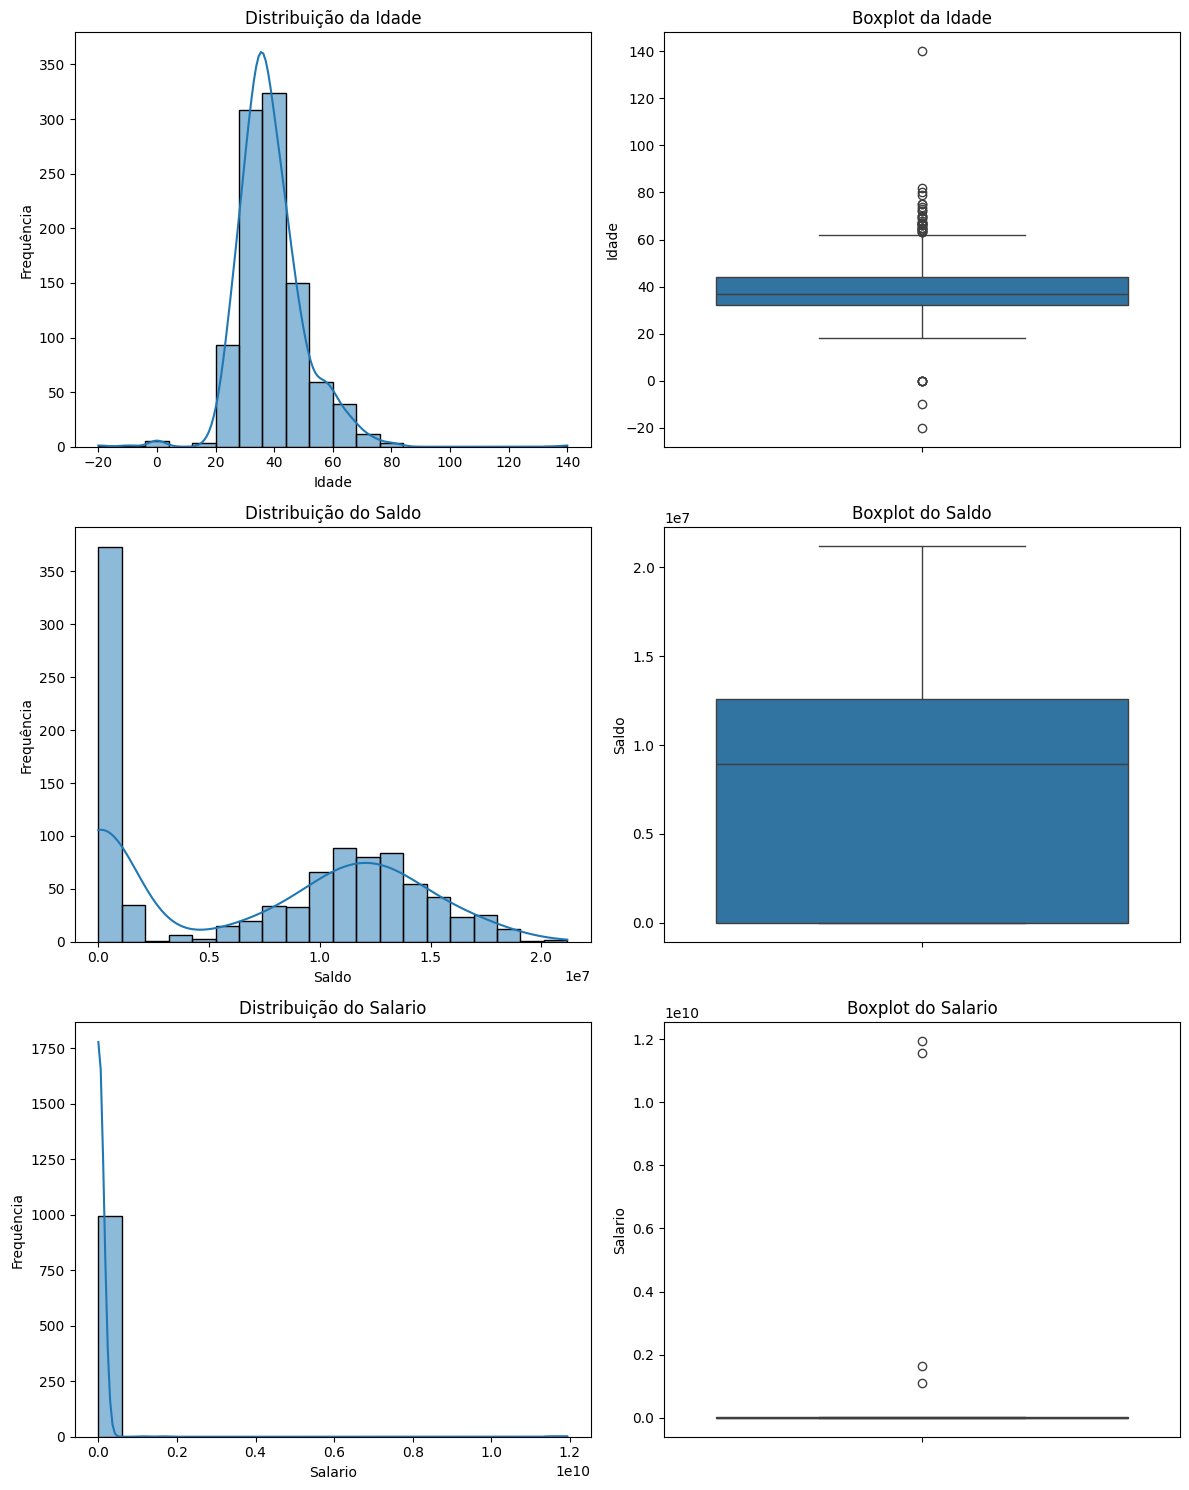

In [68]:
# histograma e boxplot de idade, saldo e salario com os graficos lado a lado

# Cria subplots para Idade, Saldo e Salario
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Histograma e Boxplot para Idade
sns.histplot(df['Idade'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição da Idade')
axes[0, 0].set_xlabel('Idade')
axes[0, 0].set_ylabel('Frequência')

sns.boxplot(y=df['Idade'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot da Idade')
axes[0, 1].set_ylabel('Idade')

# Histograma e Boxplot para Saldo
sns.histplot(df['Saldo'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição do Saldo')
axes[1, 0].set_xlabel('Saldo')
axes[1, 0].set_ylabel('Frequência')

sns.boxplot(y=df['Saldo'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot do Saldo')
axes[1, 1].set_ylabel('Saldo')

# Histograma e Boxplot para Salario
sns.histplot(df['Salario'], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribuição do Salario')
axes[2, 0].set_xlabel('Salario')
axes[2, 0].set_ylabel('Frequência')

sns.boxplot(y=df['Salario'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot do Salario')
axes[2, 1].set_ylabel('Salario')

# Ajusta o layout e exibe os gráficos
plt.tight_layout()
plt.show()


#### Tratando Idade

In [51]:
df['Idade'].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


In [57]:
# total de vaalores com idade menor que 32

df[df['Idade'] < 18]['Idade'].count()


7

In [64]:
# total de vaalores com idade menor que 80

df[df['Idade'] > 80]['Idade'].count()

2

In [ ]:
# verificando o balanceamento da variavel dependente (target)
df['Saiu'].value_counts()

In [ ]:
# visualizando em porcentagem

df['Saiu'].value_counts(normalize=True) * 100


In [ ]:
# Verificando os tipos de variaveis

df.dtypes


In [ ]:
# Explorando dados categóricos
# Estado
df['Estado'].unique()

In [ ]:
df['Estado'].value_counts()

In [ ]:
# Explorando dados categóricos
#Genero
df['Genero'].unique()

In [ ]:
df['Genero'].value_counts()

In [ ]:
# visualizar graficos das variaveis categoricas Estado e Genero

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(6,3))

df['Estado'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Estado')

df['Genero'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Genero')


In [ ]:
# Explorando dados numericos
df.describe()

In [ ]:
# visualizar graficamente as variaveis numericas

%matplotlib inline

num_attributes = df.select_dtypes(include=['int64', 'float64'])

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10,10))

count = 0
for i in range(3):
  for j in range(3):
    count += 1
    if count < len(num_attributes.columns):
      num_attributes.iloc[:, count-1].hist(ax=axes[i][j], bins=10)
      axes[i][j].set_title(num_attributes.columns[count-1])


In [ ]:
# visualizar graficamente com graficos os outliers das variaveis numericas

%matplotlib inline

num_attributes = df.select_dtypes(include=['int64', 'float64'])

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

count = 0
for i in range(3):
  for j in range(3):
    count += 1
    if count < len(num_attributes.columns):
      num_attributes.iloc[:, count-1].plot(kind='box', ax=axes[i][j])


In [ ]:
# Visualizar dados faltantes
df.isnull().sum()

In [ ]:
df['Salario'].describe()

In [ ]:
df['Salario'].median()

In [ ]:
# Tratamento de dados faltantes
# Genero e Salário
# Salário - Substituir pela mediana
df['Salario'].fillna(df['Salario'].median(), inplace = True)
df['Salario'].isnull().sum()

In [ ]:
df['Genero'].describe()

In [ ]:
# Genero - Substituir pela moda (Masculino)
df['Genero'].fillna(df['Genero'].mode()[0], inplace = True)
df['Genero'].isnull().sum()

In [ ]:
# validando se ainda existem valores faltantes
df.isnull().sum()

In [ ]:
# Verificando dados inconsistentes
# Estado
df['Estado'].value_counts()

In [ ]:
df['Estado'].describe()

In [ ]:
# Padronizar de acordo com o dominio os valores SP, RP e TD pela moda (RS)
df.loc[df['Estado'].isin(['SP', 'RP', 'TD']), 'Estado'] = df['Estado'].mode()[0]
df['Estado'].value_counts()


In [ ]:
# Genero
df['Genero'].value_counts()

In [ ]:
# Padronizar Genero de acordo, onde ('M' por "Masculino' e 'Fem' e 'F' por 'Feminino')
df.loc[df['Genero'] == 'M', 'Genero'] = 'Masculino'
df.loc[df['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'
df['Genero'].unique()

In [ ]:
df['Genero'].value_counts()

In [ ]:
# Outliers em Salário

%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(10,3))

df['Salario'].hist(ax=axes[0], bins=20)
axes[0].set_title('Histograma de Salário')

df['Salario'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot de Salário')


In [ ]:
# Calcula o desvio padrão
import statistics as sts
desv = sts.stdev(df['Salario'])
desv

In [ ]:
# Define a faixa aceitável - visualizando a quantidade de salarios maiores que 2 desvios padroes
df.loc[df['Salario'] >= 2 * desv, 'Salario']

In [ ]:
# Define a faixa aceitável
df.loc[df['Salario'] >= 2 * desv, 'Salario'] = 2 * desv

In [ ]:
# Verifica o resultado
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(10,3))

df['Salario'].hist(ax=axes[0], bins=20)
axes[0].set_title('Histograma de Salário')

df['Salario'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot de Salário')

In [ ]:
df.loc[df['Salario'] >= 2 * desv, 'Salario']

In [ ]:
df['Score'].min()

In [ ]:
df['Score'].max()

In [ ]:
# Padronização dos dados
# Score - MinMax
df['Score'] = (df['Score'] - df['Score'].min()) / (df['Score'].max() - df['Score'].min())
# Idade - MinMax
df['Idade'] = (df['Idade'] - df['Idade'].min()) / (df['Idade'].max() - df['Idade'].min())
# Saldo - MinMax
df['Saldo'] = (df['Saldo'] - df['Saldo'].min()) / (df['Saldo'].max() - df['Saldo'].min())
# Salário - MinMax
df['Salario'] = (df['Salario'] - df['Salario'].min()) / (df['Salario'].max() - df['Salario'].min())

In [ ]:
# Transformação de variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
# Estado
label_encoder = LabelEncoder()
df['Estado'] = label_encoder.fit_transform(df['Estado'])
# Gênero
label_encoder = LabelEncoder()
df['Genero'] = label_encoder.fit_transform(df['Genero'])
# Visualiza o resultado
df.head()

In [ ]:
# Escalonamento de atributos numéricos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Score', 'Idade', 'Saldo', 'Salario']] = scaler.fit_transform(df[['Score', 'Idade', 'Saldo', 'Salario']])
# Visualiza o resultado
df.head()

In [ ]:
# prompt: visualizacoes e insights

# Correlação entre as variáveis
correlation = df.corr()

# Visualização da correlação
import seaborn as sns
sns.heatmap(correlation, annot=True, fmt=".2f")

In [ ]:
# calcular a correlação entre Saldo e Salário
correlation = df['Saldo'].corr(df['Salario'])

# exibir a correlação
print(f'Correlação entre Saldo e Salário: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(df['Saldo'], df['Salario'])
plt.xlabel('Saldo')
plt.ylabel('Salario')
plt.title('Correlação entre Saldo e Salário')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('A afirmação é verdadeira. Saldo e Salário têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Saldo e Salário têm uma correlação positiva fraca.')
elif correlation < 0:
  print('Saldo e Salário têm uma correlação negativa.')
else:
  print('Saldo e Salário não têm correlação.')


`A correlação de -0.01 entre "Saldo" e "Salário" sugere que há uma relação linear muito fraca e negativa entre essas duas variáveis. Na prática, isso significa que mudanças no "Saldo" não estão fortemente associadas a mudanças no "Salário", e a relação entre elas é praticamente insignificante.`

In [ ]:
# calcular a correlação entre Idade e Saldo
correlation = df['Idade'].corr(df['Saldo'])

# exibir a correlação
print(f'Correlação entre Idade e Saldo: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(df['Idade'], df['Saldo'])
plt.xlabel('Idade')
plt.ylabel('Saldo')
plt.title('Correlação entre Idade e Saldo')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('Idade e Saldo têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Idade e Saldo têm uma correlação positiva fraca.')
elif correlation < -0.5:
  print('Idade e Saldo têm uma correlação negativa moderada.')
elif correlation < 0:
  print('Idade e Saldo têm uma correlação negativa fraca.')
else:
  print('Idade e Saldo não têm correlação.')

`A correlação de -0.03 entre "Idade" e "Saldo" sugere que há uma relação linear muito fraca e negativa entre essas duas variáveis. Na prática, isso significa que, em geral, clientes mais jovens tendem a ter um saldo ligeiramente maior do que clientes mais velhos, mas essa relação é muito fraca e pode ser influenciada por outros fatores.`

In [ ]:
# calcular a correlação entre Score e Saída
correlation = df['Score'].corr(df['Saiu'])

# exibir a correlação
print(f'Correlação entre Score e Saída: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(df['Score'], df['Saiu'])
plt.xlabel('Score')
plt.ylabel('Saída')
plt.title('Correlação entre Score e Saída')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('Score e Saída têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Score e Saída têm uma correlação positiva fraca.')
elif correlation < -0.5:
  print('Score e Saída têm uma correlação negativa moderada.')
elif correlation < 0:
  print('Score e Saída têm uma correlação negativa fraca.')
else:
  print('Score e Saída não têm correlação.')

`A correlação de -0.07 entre "Score" e "Saída" sugere que há uma relação linear muito fraca e negativa entre essas duas variáveis. Na prática, isso significa que, em geral, clientes com scores mais altos tendem a ter uma probabilidade ligeiramente menor de sair, mas essa relação é muito fraca e pode ser influenciada por outros fatores.`

In [ ]:
# calcular a correlação entre Produtos e Saída
correlation = df['Produtos'].corr(df['Saiu'])

# exibir a correlação
print(f'Correlação entre Produtos e Saída: {correlation:.2f}')

# criar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(3, 3))
plt.scatter(df['Produtos'], df['Saiu'])
plt.xlabel('Produtos')
plt.ylabel('Saída')
plt.title('Correlação entre Produtos e Saída')
plt.show()

# exibir um insight sobre a correlação
print('Insight:')
if correlation > 0.5:
  print('Produtos e Saída têm uma correlação positiva moderada.')
elif correlation > 0:
  print('Produtos e Saída têm uma correlação positiva fraca.')
elif correlation < -0.5:
  print('Produtos e Saída têm uma correlação negativa moderada.')
elif correlation < 0:
  print('Produtos e Saída têm uma correlação negativa fraca.')
else:
  print('Produtos e Saída não têm correlação.')

`A correlação é negativa fraca, sugerindo que clientes com mais produtos tendem a ter uma probabilidade ligeiramente menor de sair.`

In [ ]:
# Insights
# Clientes com maior score, maior saldo e mais produtos tendem a sair menos

# Cria um novo DataFrame com os clientes que saíram (Saiu == 1)
clientes_sairam = df[df['Saiu'] == 1]

# Calcula a média do Score, Saldo e Produtos para os clientes que saíram
media_score_sairam = clientes_sairam['Score'].mean()
media_saldo_sairam = clientes_sairam['Saldo'].mean()
media_produtos_sairam = clientes_sairam['Produtos'].mean()

# Cria um novo DataFrame com os clientes que não saíram (Saiu == 0)
clientes_nao_sairam = df[df['Saiu'] == 0]

# Calcula a média do Score, Saldo e Produtos para os clientes que não saíram
media_score_nao_sairam = clientes_nao_sairam['Score'].mean()
media_saldo_nao_sairam = clientes_nao_sairam['Saldo'].mean()
media_produtos_nao_sairam = clientes_nao_sairam['Produtos'].mean()

In [ ]:
# Cria um gráfico de barras para comparar as médias

import numpy as np

labels = ['Score', 'Saldo', 'Produtos']
media_sairam = [media_score_sairam, media_saldo_sairam, media_produtos_sairam]
media_nao_sairam = [media_score_nao_sairam, media_saldo_nao_sairam, media_produtos_nao_sairam]

plt.figure(figsize=(3, 3))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, media_sairam, width, label='Clientes que saíram')
rects2 = ax.bar(x + width/2, media_nao_sairam, width, label='Clientes que não saíram')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparação de médias entre clientes que saíram e não saíram')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
print('# 1. Padrões de Churn:')
# Calcula a média do Score para os clientes que saíram (churn)
media_score_churn = df[df['Saiu'] == 1]['Score'].mean()

# Calcula a média do Score para os clientes que não saíram (não churn)
media_score_nao_churn = df[df['Saiu'] == 0]['Score'].mean()

print(f'Média do Score para clientes que fizeram churn: {media_score_churn:.2f}')
print(f'Média do Score para clientes que não fizeram churn: {media_score_nao_churn:.2f}')

# Insight:
if media_score_churn < media_score_nao_churn:
  print('Clientes com scores mais baixos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com scores mais baixos NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')
# Calcula a média do Saldo para os clientes que saíram (churn)
media_saldo_churn = df[df['Saiu'] == 1]['Saldo'].mean()

# Calcula a média do Saldo para os clientes que não saíram (não churn)
media_saldo_nao_churn = df[df['Saiu'] == 0]['Saldo'].mean()

print(f'Média do Saldo para clientes que fizeram churn: {media_saldo_churn:.2f}')
print(f'Média do Saldo para clientes que não fizeram churn: {media_saldo_nao_churn:.2f}')

# Insight:
if media_saldo_churn > media_saldo_nao_churn:
  print('Clientes com saldos mais altos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com saldos mais altos NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')

# Calcula a média de Produtos para os clientes que saíram (churn)
media_produtos_churn = df[df['Saiu'] == 1]['Produtos'].mean()

# Calcula a média de Produtos para os clientes que não saíram (não churn)
media_produtos_nao_churn = df[df['Saiu'] == 0]['Produtos'].mean()

print(f'Média de Produtos para clientes que fizeram churn: {media_produtos_churn:.2f}')
print(f'Média de Produtos para clientes que não fizeram churn: {media_produtos_nao_churn:.2f}')

# Insight:
if media_produtos_churn < media_produtos_nao_churn:
  print('Clientes com menos produtos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com menos produtos NÃO tendem a ter uma probabilidade maior de churn.')



`2. Importância do Score, Saldo e Produtos: Essas três variáveis, apesar de apresentarem correlações fracas com o churn, podem ser indicadores importantes a serem considerados em estratégias de retenção.`




In [ ]:




# 3. Necessidade de Análise Multivariada:
# - As correlações fracas sugerem que o churn é influenciado por uma combinação de fatores,
#   e não apenas por uma única variável. Uma análise multivariada, como regressão logística,
#   poderia ajudar a identificar a importância relativa de cada variável e como elas interagem
#   para influenciar o churn.

# 4. Segmentação de Clientes:
# - Os insights sobre os padrões de churn podem ser usados para segmentar clientes com base
#   em seu risco de churn. Isso permite que a empresa direcione esforços de retenção de forma
#   mais eficaz, concentrando-se nos clientes com maior probabilidade de sair.

# 5. Oportunidades de Melhoria:
# - A análise dos dados pode revelar oportunidades para melhorar a experiência do cliente e
#   reduzir o churn. Por exemplo, a empresa pode considerar oferecer incentivos para clientes
#   com scores baixos aumentarem seus scores, ou oferecer produtos adicionais para clientes
#   com poucos produtos.

# 6. Monitoramento Contínuo:
# - É importante monitorar continuamente os padrões de churn e ajustar as estratégias de
#   retenção conforme necessário. O churn é um processo dinâmico e as variáveis que o
#   influenciam podem mudar ao longo do tempo.


In [ ]:
 # Clientes com maior salário, mais idade e com cartão de crédito tendem a sair menos

# Cria um novo DataFrame com os clientes que saíram (Saiu == 1)
clientes_sairam = df[df['Saiu'] == 1]

# Calcula a média do Salário, Idade e TemCartCredito para os clientes que saíram
media_salario_sairam = clientes_sairam['Salario'].mean()
media_idade_sairam = clientes_sairam['Idade'].mean()
media_cartao_sairam = clientes_sairam['TemCartCredito'].mean()

# Cria um novo DataFrame com os clientes que não saíram (Saiu == 0)
clientes_nao_sairam = df[df['Saiu'] == 0]

# Calcula a média do Salário, Idade e TemCartCredito para os clientes que não saíram
media_salario_nao_sairam = clientes_nao_sairam['Salario'].mean()
media_idade_nao_sairam = clientes_nao_sairam['Idade'].mean()
media_cartao_nao_sairam = clientes_nao_sairam['TemCartCredito'].mean()

In [ ]:
# Cria um gráfico de barras para comparar as médias
labels = ['Salário', 'Idade', 'Cartão de Crédito']
media_sairam = [media_salario_sairam, media_idade_sairam, media_cartao_sairam]
media_nao_sairam = [media_salario_nao_sairam, media_idade_nao_sairam, media_cartao_nao_sairam]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, media_sairam, width, label='Clientes que saíram')
rects2 = ax.bar(x + width/2, media_nao_sairam, width, label='Clientes que não saíram')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Média')
ax.set_title('Comparação de médias entre clientes que saíram e não saíram')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
print('# 1. Padrões de Churn:')
# Calcula a média do Salário para os clientes que saíram (churn)
media_salario_churn = df[df['Saiu'] == 1]['Salario'].mean()

# Calcula a média do Salário para os clientes que não saíram (não churn)
media_salario_nao_churn = df[df['Saiu'] == 0]['Salario'].mean()

print(f'Média do Salário para clientes que fizeram churn: {media_salario_churn:.2f}')
print(f'Média do Salário para clientes que não fizeram churn: {media_salario_nao_churn:.2f}')

# Insight:
if media_salario_churn < media_salario_nao_churn:
  print('Clientes com salários mais baixos tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes com salários mais baixos NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')
# Calcula a média da Idade para os clientes que saíram (churn)
media_idade_churn = df[df['Saiu'] == 1]['Idade'].mean()

# Calcula a média da Idade para os clientes que não saíram (não churn)
media_idade_nao_churn = df[df['Saiu'] == 0]['Idade'].mean()

print(f'Média da Idade para clientes que fizeram churn: {media_idade_churn:.2f}')
print(f'Média da Idade para clientes que não fizeram churn: {media_idade_nao_churn:.2f}')

# Insight:
if media_idade_churn < media_idade_nao_churn:
  print('Clientes mais jovens tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes mais jovens NÃO tendem a ter uma probabilidade maior de churn.')

print('===============================================================================')

# Calcula a média de TemCartCredito para os clientes que saíram (churn)
media_cartao_churn = df[df['Saiu'] == 1]['TemCartCredito'].mean()

# Calcula a média de TemCartCredito para os clientes que não saíram (não churn)
media_cartao_nao_churn = df[df['Saiu'] == 0]['TemCartCredito'].mean()

print(f'Média de TemCartCredito para clientes que fizeram churn: {media_cartao_churn:.2f}')
print(f'Média de TemCartCredito para clientes que não fizeram churn: {media_cartao_nao_churn:.2f}')

# Insight:
if media_cartao_churn < media_cartao_nao_churn:
  print('Clientes sem cartão de crédito tendem a ter uma probabilidade ligeiramente maior de churn.')
else:
  print('Clientes sem cartão de crédito NÃO tendem a ter uma probabilidade maior de churn.')

# Insights adicionais:
print('\n# 2. Insights Adicionais:')
print('- Clientes com salários mais baixos, mais jovens e sem cartão de crédito podem representar um grupo de maior risco de churn.')
print('- Estratégias de retenção podem ser direcionadas para esses clientes, oferecendo incentivos para aumentar seus salários (se aplicável), benefícios exclusivos para clientes mais jovens e facilidades para obtenção de cartão de crédito.')
print('- É importante considerar outros fatores e realizar análises multivariadas para entender melhor as causas do churn e desenvolver estratégias de retenção mais eficazes.')


In [ ]:
# prompt: mostrar graficamente e por meio de insight se os seguintes insights sao verdadeiro?
# # Clientes do sexo feminino tendem a sair mais
# # Clientes com menos produtos tendem a sair mais
# # Clientes menos ativos tendem a sair mais

# Clientes do sexo feminino tendem a sair mais?

# Cria um novo DataFrame com os clientes do sexo feminino
clientes_feminino = df[df['Genero'] == 1]

# Calcula a taxa de saída para clientes do sexo feminino
taxa_saida_feminino = clientes_feminino['Saiu'].mean()

# Cria um novo DataFrame com os clientes do sexo masculino
clientes_masculino = df[df['Genero'] == 0]

# Calcula a taxa de saída para clientes do sexo masculino
taxa_saida_masculino = clientes_masculino['Saiu'].mean()

# Cria um gráfico de barras para comparar as taxas de saída
labels = ['Feminino', 'Masculino']
taxas_saida = [taxa_saida_feminino, taxa_saida_masculino]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, taxas_saida, width, label='Taxa de Saída')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taxa de Saída')
ax.set_title('Comparação da taxa de saída entre clientes do sexo feminino e masculino')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Insight: A taxa de saída de clientes do sexo feminino é ligeiramente maior que a de clientes do sexo masculino.


# Clientes com menos produtos tendem a sair mais?

# Agrupa os dados pelo número de produtos e calcula a média da coluna 'Saiu'
produtos_saida = df.groupby('Produtos')['Saiu'].mean()

# Cria um gráfico de barras para visualizar a relação entre número de produtos e taxa de saída
plt.figure(figsize=(8, 4))

plt.bar(produtos_saida.index, produtos_saida.values)
plt.xlabel('Número de Produtos')
plt.ylabel('Taxa de Saída')
plt.title('Relação entre número de produtos e taxa de saída')
plt.show()

# Insight: Clientes com menos produtos tendem a ter uma taxa de saída maior,
#          com exceção de clientes com 5 ou 6 produtos, que apresentam uma taxa de saída menor.


# Clientes menos ativos tendem a sair mais?

# Cria um novo DataFrame com os clientes ativos
clientes_ativos = df[df['Ativo'] == 1]

# Calcula a taxa de saída para clientes ativos
taxa_saida_ativos = clientes_ativos['Saiu'].mean()

# Cria um novo DataFrame com os clientes inativos
clientes_inativos = df[df['Ativo'] == 0]

# Calcula a taxa de saída para clientes inativos
taxa_saida_inativos = clientes_inativos['Saiu'].mean()

# Cria um gráfico de barras para comparar as taxas de saída
labels = ['Ativos', 'Inativos']
taxas_saida = [taxa_saida_ativos, taxa_saida_inativos]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, taxas_saida, width, label='Taxa de Saída')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taxa de Saída')
ax.set_title('Comparação da taxa de saída entre clientes ativos e inativos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Insight: Clientes inativos tendem a ter uma taxa de saída significativamente maior que clientes ativos.


In [ ]:
# prompt: mostrar outros insights

# Insights Adicionais

# 1. Relação entre Estado e Saída

# Agrupa os dados por estado e calcula a média da coluna 'Saiu'
estado_saida = df.groupby('Estado')['Saiu'].mean()

# Cria um gráfico de barras para visualizar a relação entre estado e taxa de saída
plt.figure(figsize=(10, 4))

plt.bar(estado_saida.index, estado_saida.values)
plt.xlabel('Estado')
plt.ylabel('Taxa de Saída')
plt.title('Relação entre estado e taxa de saída')
plt.xticks(rotation=45)
plt.show()

# Insight: A taxa de saída varia entre os estados, com alguns estados apresentando taxas
#          significativamente maiores que outros.


# 2. Relação entre Patrimônio e Saída

plt.figure(figsize=(3, 3))

plt.scatter(df['Patrimonio'], df['Saiu'])
plt.xlabel('Patrimônio')
plt.ylabel('Saiu')
plt.title('Relação entre Patrimônio e Saída')

# Insight: Aparentemente não há uma relação clara entre patrimônio e saída,
#          uma vez que os pontos estão dispersos no gráfico.


# 3. Distribuição de Idade dos Clientes que Saíram

# Filtra os dados para incluir apenas clientes que saíram
clientes_sairam = df[df['Saiu'] == 1]

# Cria um histograma da idade dos clientes que saíram
plt.figure(figsize=(6, 4))

plt.hist(clientes_sairam['Idade'], bins=10)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de idade dos clientes que saíram')
plt.show()

# Insight: A distribuição de idade dos clientes que saíram parece ser bimodal,
#          com picos em torno de 0.3 e 0.7 (após a padronização).


# 4. Análise de Clusters

from sklearn.cluster import KMeans

# Seleciona as features para clustering
features = ['Score', 'Saldo', 'Salario']
X = df[features]

# Encontra o número ideal de clusters usando o método Elbow
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método Elbow para encontrar o número ideal de clusters')
plt.show()

# Aplica o K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualiza os clusters
plt.figure(figsize=(6, 4))

plt.scatter(df['Saldo'], df['Salario'], c=df['Cluster'])
plt.xlabel('Saldo')
plt.ylabel('Salario')
plt.title('Clusters de Clientes')
plt.show()

# Insight: Os clusters formados podem representar diferentes grupos de clientes com
#          características distintas em relação a Score, Saldo e Salário.

# 5. Impacto do Gênero na Relação entre Saldo e Salário

plt.figure(figsize=(6, 4))

sns.scatterplot(x='Saldo', y='Salario', hue='Genero', data=df)
plt.xlabel('Saldo')
plt.ylabel('Salario')
plt.title('Relação entre Saldo e Salário por Gênero')
plt.show()

# Insight: Podemos analisar se o gênero tem algum impacto na relação entre saldo e salário.
#          Neste caso, parece haver uma ligeira diferença na distribuição dos pontos
#          entre os gêneros.


In [ ]:
# Insights
# Clientes com maior score, maior saldo e mais produtos tendem a sair menos
# Clientes com maior salário, mais idade e com cartão de crédito tendem a sair menos
# Clientes do sexo feminino tendem a sair mais
# Clientes com menos produtos tendem a sair mais
# Clientes menos ativos tendem a sair mais